Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.5375 - loss: 0.6946 - val_accuracy: 0.5940 - val_loss: 0.6623
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.6045 - loss: 0.6682 - val_accuracy: 0.6760 - val_loss: 0.6481
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.6430 - loss: 0.6419 - val_accuracy: 0.6730 - val_loss: 0.6007
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.6905 - loss: 0.5961 - val_accuracy: 0.6960 - val_loss: 0.5841
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.7130 - loss: 0.5715 - val_accuracy: 0.7010 - val_loss: 0.5770
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.7195 - loss: 0.5643 - val_accuracy: 0.6720 - val_loss: 0.6421
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.7495 - loss: 0.5249 - val_accuracy: 0.7200 - val_loss: 0.5684
Epoch 8/10
63

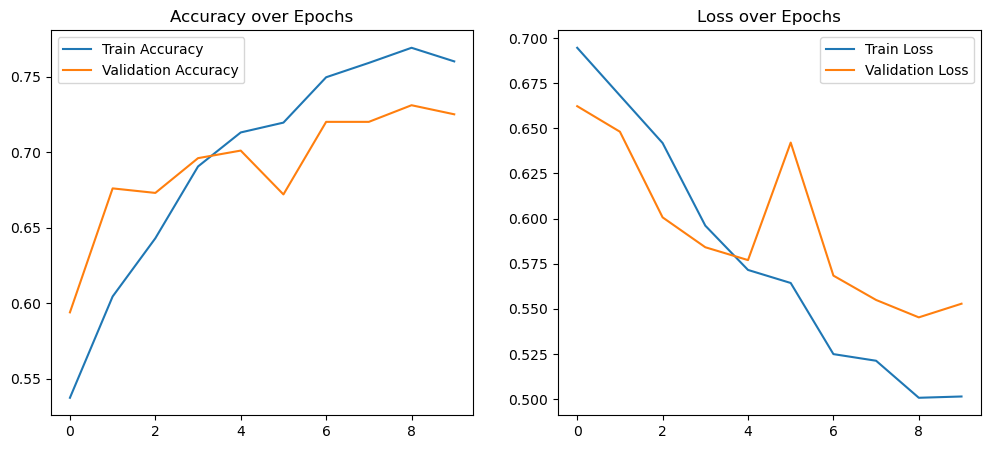

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Prediction: Cat 🐱


In [15]:
# ===================================
# Dogs vs Cats Image Classifier (CNN)
# ===================================
# Internship-ready polished notebook

# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# -----------------------------
#  Data Preprocessing
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'cats_and_dogs_filtered/train',   # ✅ fixed
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'cats_and_dogs_filtered/validation',  # ✅ fixed
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# -----------------------------
#  Build the CNN Model
# -----------------------------
cnn = tf.keras.models.Sequential()

# Convolution + Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Second layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# -----------------------------
#  Compile the CNN
# -----------------------------
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
#  Train the Model
# -----------------------------
history = cnn.fit(
    training_set,
    validation_data=test_set,
    epochs=10
)

# -----------------------------
#  Plot Accuracy & Loss
# -----------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

# -----------------------------
#  Prediction Function
# -----------------------------
def predict_image(img_path):
    test_img = image.load_img(img_path, target_size=(64, 64))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img = test_img / 255.0
    result = cnn.predict(test_img)
    if result[0][0] > 0.5:
        prediction = 'Dog 🐶'
    else:
        prediction = 'Cat 🐱'
    return prediction

# -----------------------------
#  Try with Custom Image
# -----------------------------
# put any cat or dog image path here, e.g.
img_path = 'cats_and_dogs_filtered/validation/cats/cat.2000.jpg'
print("Prediction:", predict_image(img_path))


In [5]:
import zipfile, os, urllib.request

# Download dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(url, "cats_and_dogs_filtered.zip")

# Extract
with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Paths
train_dir = "cats_and_dogs_filtered/train"
val_dir = "cats_and_dogs_filtered/validation"

# Data generators
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 3 classes.
Found 1000 images belonging to 2 classes.


In [13]:
import shutil

for folder in ["cats_and_dogs_filtered/train", "cats_and_dogs_filtered/validation"]:
    checkpoint = os.path.join(folder, ".ipynb_checkpoints")
    if os.path.exists(checkpoint):
        print("Removing:", checkpoint)
        shutil.rmtree(checkpoint)


print("Train folders:", os.listdir("cats_and_dogs_filtered/train"))
print("Validation folders:", os.listdir("cats_and_dogs_filtered/validation"))


Removing: cats_and_dogs_filtered/train\.ipynb_checkpoints
Removing: cats_and_dogs_filtered/validation\.ipynb_checkpoints
Train folders: ['cats', 'dogs']
Validation folders: ['cats', 'dogs']


In [14]:
import shutil

print("Train folders:", os.listdir("cats_and_dogs_filtered/train"))
print("Validation folders:", os.listdir("cats_and_dogs_filtered/validation"))

Train folders: ['cats', 'dogs']
Validation folders: ['cats', 'dogs']


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Classes: {'cats': 0, 'dogs': 1}


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 347ms/step - accuracy: 0.5025 - loss: 0.7150 - val_accuracy: 0.5200 - val_loss: 0.6852
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.5780 - loss: 0.6778 - val_accuracy: 0.5710 - val_loss: 0.6682
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.6555 - loss: 0.6203 - val_accuracy: 0.6370 - val_loss: 0.6239
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.7245 - loss: 0.5476 - val_accuracy: 0.6320 - val_loss: 0.6399
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.7670 - loss: 0.4955 - val_accuracy: 0.6870 - val_loss: 0.6147
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.7745 - loss: 0.4704 - val_accuracy: 0.6610 - val_loss: 0.6311
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8055 - loss: 0.4217 - val_accuracy: 0.6720 - val_loss: 0.6616
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8270 - loss: 0.3784 - val_accu

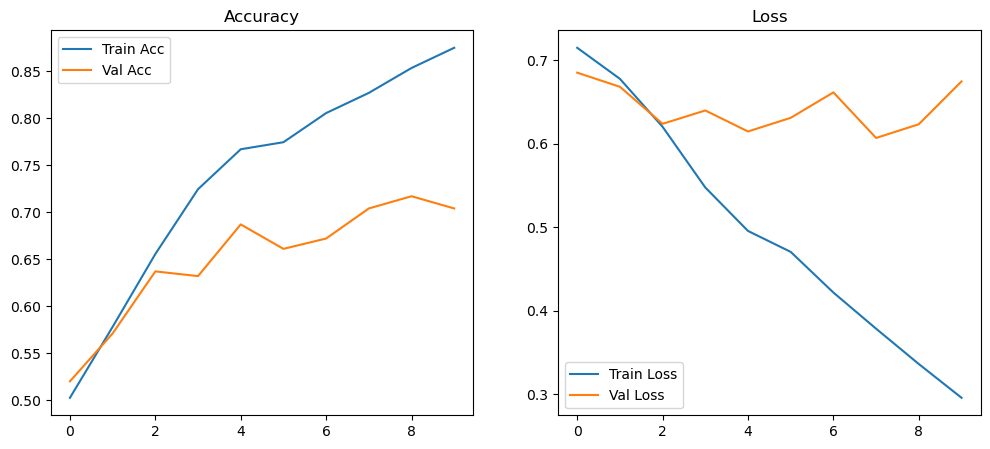

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
CAT sample: Cat 🐱 (p_dog=0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
DOG sample: Dog 🐶 (p_dog=0.60)


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# -----------------------------
# 1) Paths
# -----------------------------
BASE_DIR = "cats_and_dogs_filtered"

train_dir = BASE_DIR + "/train"
val_dir   = BASE_DIR + "/validation"

# -----------------------------
# 2) Preprocessing
# -----------------------------
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary"   # ✅ force binary
)

val_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary"
)

print("Classes:", train_set.class_indices)  # should show only {'cats': 0, 'dogs': 1}

# -----------------------------
# 3) Model
# -----------------------------
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# -----------------------------
# 4) Training
# -----------------------------
history = cnn.fit(
    train_set,
    epochs=10,
    validation_data=val_set
)

# -----------------------------
# 5) Plot
# -----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# -----------------------------
# 6) Prediction Function
# -----------------------------
def predict_image(img_path):
    img = load_img(img_path, target_size=(64,64))
    img_array = img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prob = cnn.predict(img_array)[0][0]

    if prob > 0.5:
        return f"Dog 🐶 (p_dog={prob:.2f})"
    else:
        return f"Cat 🐱 (p_dog={prob:.2f})"

# -----------------------------
# 7) Test
# -----------------------------
print("CAT sample:", predict_image(val_dir+"/cats/cat.2268.jpg"))
print("DOG sample:", predict_image(val_dir+"/dogs/dog.2369.jpg"))
